Playing with Sound
===

Install these libraries:

    > python -m pip install pyaudio
    > python -m pip install matplotlib
    > python -m pip instal  wave
    > python -m pip install scipy

Recording Sound
---

In [1]:
import pyaudio
import wave

# Setup channel info
FORMAT = pyaudio.paInt16 # data type formate
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 2
WAVE_OUTPUT_FILENAME = "my_sound_file.wav"

# Startup pyaudio instance
audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print("recording...")

frames = []

# Record for RECORD_SECONDS
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print( "finished recording")

# Stop Recording
stream.stop_stream()
stream.close()
audio.terminate()

# Write your new .wav file with built in Python 3 Wave module
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

recording...
finished recording


Analyzing Sound
---

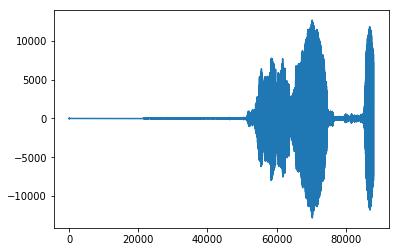

In [2]:
from matplotlib import pyplot as plt

from scipy.io import wavfile

# Read the .wav file
filename = 'my_sound_file.wav'
sample_rate, data = wavfile.read(filename)

plt.plot(data)
plt.show()


Playing with color
---

This code will make a screen appear on your screen, with a background color.

In [ ]:
import turtle

screen = turtle.Screen()
screen.bgcolor(1, 0, 0)

for r in range(0, 1000):
	screen.bgcolor(r/1000, 0.5, 0.5)

turtle.done()

Detecting Frequencies
---

The following code detects the main frequencies in a recorded sound file.

In [ ]:
# Read in a WAV and find the freq's

# From: https://stackoverflow.com/questions/2648151/python-frequency-detection


import pyaudio
import wave
import numpy as np

chunk = 2048

# open up a wave
wf = wave.open('my_sound_file.wav', 'rb')
swidth = wf.getsampwidth()
RATE = wf.getframerate()
# use a Blackman window
window = np.blackman(chunk)
# open stream
p = pyaudio.PyAudio()
stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = RATE,
                output = True)

# read some data
data = wf.readframes(chunk)
# play stream and find the frequency of each chunk
while len(data) == chunk*swidth:
    # write data out to the audio stream
    stream.write(data)
    # unpack the data and times by the hamming window
    indata = np.array(wave.struct.unpack("%dh"%(len(data)/swidth),\
                                         data))*window
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/chunk
        print("The freq is %f Hz." % (thefreq))
    else:
        thefreq = which*RATE/chunk
        print("The freq is %f Hz." % (thefreq))
    # read some more data
    data = wf.readframes(chunk)
if data:
    stream.write(data)
stream.close()
p.terminate()